In [1]:
import numpy as np
import pandas as pd


import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Taking data from covid 03-2020 to 03-2023


In [4]:
data = pd.read_csv('/content/drive/MyDrive/TCS.NS.csv')
data['Date'] = pd.to_datetime(data['Date'])

start_date = '2020-03-30'
end_date = '2023-03-20'

filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
df = filtered_data

Our Data-set from march 2020 - march 2023


In [5]:
df.shape

(740, 7)

In [6]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)


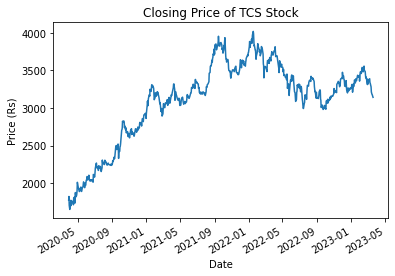

In [7]:
df['Close'].plot(title='Closing Price of TCS Stock', xlabel='Date', ylabel='Price (Rs)')
plt.show()

In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,1766.000000,1905.000000,1763.550049,1778.500000,1684.919922,8513547
1,2020-03-31,1837.400024,1855.000000,1780.000000,1826.099976,1730.015503,3927593
2,2020-04-01,1825.900024,1834.750000,1702.000000,1708.750000,1618.840088,4941878
3,2020-04-03,1740.000000,1740.000000,1650.000000,1654.199951,1567.160400,5735369
4,2020-04-07,1710.000000,1785.849976,1705.000000,1775.199951,1681.793457,5427577


Seasonal decomposition is a technique used to break down a time series into its trend, seasonal, and residual 

->  If the magnitude of the seasonal component changes with time, then the series is multiplicative.
so we have taken multiplicative here -> Multiplicative: 
x
t
 = Trend * Seasonal * Random

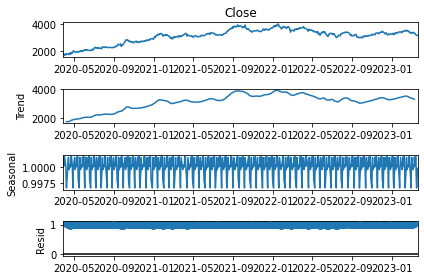

In [9]:
df.index = df['Date']
results = seasonal_decompose(df['Close'],model = 'multiplicative' , period = 12)
results.plot();

In [10]:
# df =df.drop(['Date' ,'Adj Close'], axis = 1)

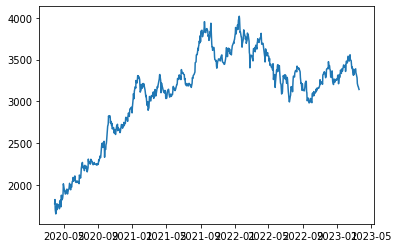

In [11]:
plt.plot(df.Close)

Making moving average 
ma100 -> moving average 100
ma50 -> moving average 50


In [12]:
ma100 = df.Close.rolling(100).mean()
ma50 = df.Close.rolling(50).mean()
ma200 = df.Close.rolling(200).mean()
ma100

Date
2020-03-30            NaN
2020-03-31            NaN
2020-04-01            NaN
2020-04-03            NaN
2020-04-07            NaN
                 ...     
2023-03-14    3339.783501
2023-03-15    3340.199500
2023-03-16    3340.675500
2023-03-17    3340.851501
2023-03-20    3340.663501
Name: Close, Length: 740, dtype: float64

Observation -> When the moving average of 50 periods crosses above the moving average of 100 periods, it is often seen as a bullish signal in technical analysis. Conversely, when the 50-period moving average crosses below the 100-period moving average, it is often seen as a bearish signal.

-> Looking at bigger picture
When a long-term moving average, such as the 200-day moving average, crosses above or below a short-term moving average, such as the 100-day moving average, it is known as a "moving average crossover." This is a common technical analysis signal used by traders and investors to identify potential changes in trend


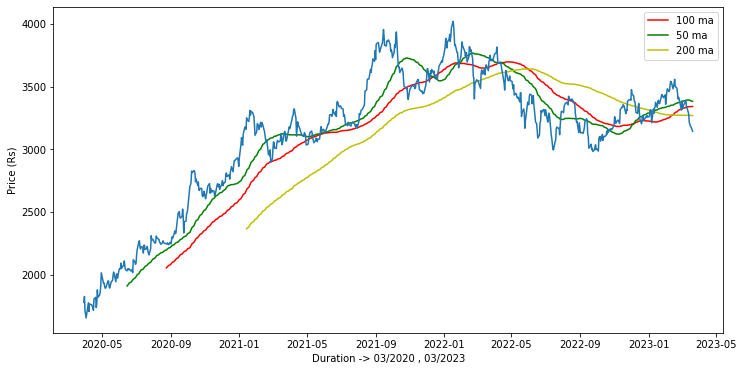

In [13]:
plt.figure(figsize = (12,6))
plt.plot(ma100 , color = 'r' ,label = "100 ma")
plt.plot(ma50 , color = 'g', label = "50 ma")
plt.plot(ma200 , color = 'y' , label = "200 ma")
plt.xlabel("Duration -> 03/2020 , 03/2023")
plt.ylabel("Price (Rs)")
plt.legend()
plt.plot(df.Close)

In [14]:
df.shape

(740, 7)

Spliting data into train and test
-> 70 % for traing and 30% for testng


In [78]:
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])  #taking first 70% of data
data_testing = pd.DataFrame(df['Close'] [int(len(df)* 0.70) : int(len(df))] )
print(data_training.shape)
print(data_testing.shape)

(518, 1)
(222, 1)


Scaled down the data using minmaxscaler and then training the data


In [79]:
scaler = MinMaxScaler(feature_range = (0,1))

Transforming the data into scaler object between 0 -1 .
ALl the values of data_training will be scaled down between 0 and 1


In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array[1:100:10]

array([[0.07268654],
       [0.06953639],
       [0.11778264],
       [0.12450584],
       [0.16573293],
       [0.16643062],
       [0.18514138],
       [0.24512145],
       [0.2629443 ],
       [0.25503717]])

In [80]:
data_training_array.shape

(518, 1)

TIme series analysis analogy .
Closing price of day will be dependent on previous days.

for previuous days values -> 100
so values of 101 th day will be dependent on previous 100 days.



In [150]:
#feature selection
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i -100 : i]) 
  # these 100 days value will be x train
  y_train.append(data_training_array[i , 0])
  # 101th day value willbecome y  train


# converting x train and y train into numpy array
x_train ,y_train = np.array(x_train), np.array(y_train)


In [108]:
# data_testing.shape
data_testing.head()

,Close
Date,
2022-05-02,3542.399902
2022-05-04,3479.750000
2022-05-05,3513.399902
2022-05-06,3432.600098
2022-05-09,3445.100098


 training data for LSTM model input which expects a 3D array of shape (samples , timesteps , *features*)

In [30]:
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(418, 100, 1)

In [109]:
final_df = past100_days.append(data_testing , ignore_index= True)
final_df.head()

<ipython-input-109-6a3e9e41da20>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past100_days.append(data_testing , ignore_index= True)


,Close
0,3536.399902
1,3584.500000
2,3626.899902
3,3601.750000
4,3636.800049


In [ ]:
input_data = scaler.fit_transform(final_df )
input_data

In [111]:
past100_days = data_training.tail(100)
past100_days.shape

(100, 1)

In [112]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):  #input_data.shape[0] -> 322
   x_test.append(input_data[i-100 : i])
   y_test.append(input_data[i, 0])



In [113]:

x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

print(y_test.shape)


(222, 100, 1)
(222,)


ML MODEL->

In [114]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

Building   of LSTM network , followed by a dropout layer  and a Dense layer ,
compiled using adam optimizer and mean squared erro as loss function 



*   20 % of layer will be droped out
*   We add the Dense layer that specifies an output of one unit



In [145]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))       #-> prevent overfitting

model.add(LSTM(units= 100, return_sequences = True ))
model.add(Dropout(0.2))

model.add(LSTM(units= 100, return_sequences = True ))
model.add(Dropout(0.2))

model.add(LSTM(units= 100, return_sequences = False ))
model.add(Dropout(0.2))

model.add(Dense(units = 1))



In [146]:
model.compile(optimizer = 'adam' , loss = "mean_squared_error")

In [ ]:
model.layers

In [ ]:
model.summary()

we fit the model to run for 100 epochs  with a batch size of 32.

In [149]:
model.fit(x_train, y_train, validation_data =(x_test , y_test), epochs = 100, batch_size= 64 ,verbose = 1)

Epoch 1/100
7/7 [==============================] - 74s 1s/step - loss: 0.1613 - val_loss: 114389958656.0000
Epoch 2/100
7/7 [==============================] - 7s 1s/step - loss: 0.0192 - val_loss: 114389876736.0000
Epoch 3/100
7/7 [==============================] - 6s 817ms/step - loss: 0.0108 - val_loss: 114389860352.0000
Epoch 4/100
7/7 [==============================] - 7s 1s/step - loss: 0.0101 - val_loss: 114389909504.0000
Epoch 5/100
7/7 [==============================] - 5s 787ms/step - loss: 0.0088 - val_loss: 114389893120.0000
Epoch 6/100
7/7 [==============================] - 8s 1s/step - loss: 0.0074 - val_loss: 114389901312.0000
Epoch 7/100
7/7 [==============================] - 5s 801ms/step - loss: 0.0068 - val_loss: 114389909504.0000
Epoch 8/100
7/7 [==============================] - 8s 1s/step - loss: 0.0076 - val_loss: 114389909504.0000
Epoch 9/100
7/7 [==============================] - 6s 865ms/step - loss: 0.0065 - val_loss: 114389934080.0000
Epoch 10/100
7/7 [======

last 100 dAYS  of data training data append to data testing
-> 100 days before 2022-05-02


Making predictions


In [151]:
y_pred.shape

(222, 1)

Scale UP the data to 

In [152]:
scaler.scale_ #factor by which all the values were scaled down

array([0.00096423])

In [153]:
scale_factor = 1 /0.00096423
y_pred = y_pred  * scale_factor
y_test = y_test * scale_factor


In [ ]:
y_pred

Ploting the predicted and Orignal values

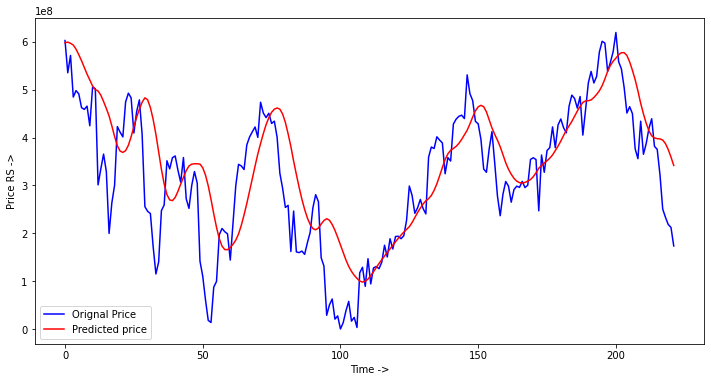

In [155]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b', label = 'Orignal Price')
plt.plot(y_pred , 'r' , label = 'Predicted price')
plt.xlabel('Time ->')
plt.ylabel('Price RS ->')
plt.legend()
plt.show()